In [214]:
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt

In [215]:
from PIL import Image # Importando o módulo Pillow para abrir a imagem no script
import pytesseract # Módulo para a utilização da tecnologia OCR

In [216]:
image = 'AgADAQADeKgxG1JUiEYg7_2Q-YJFHvsgFDAABAEAAwIAA3kAA2p1AwABFgQ'
receipt_BGR = cv2.imread('../receipts/' + image)
receipt = cv2.cvtColor(receipt_BGR, cv2.COLOR_BGR2GRAY)

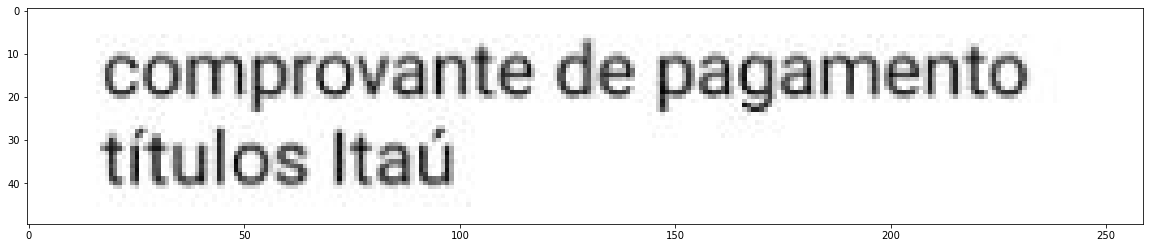

In [223]:
plt.figure(figsize = (20, 35))
plt.imshow(receipt[50:100, :], cmap = 'gray')

In [237]:
def normalize_payer(full_payer):
    payers = ['Andre', 'Barbara']
    for payer in payers:
        if payer.lower() in full_payer.lower():
            return payer
    return full_payer

def valid_bill_name(bill_name):
    bill = bill_name.lower()
    if 'comprovante' in bill and 'pagamento' in bill and 'titulos' in bill:
        return None
    else:
        return bill_name.replace('\n', ' ')

In [238]:
def submit_boleto(receipt):
    bill_name_img = receipt[50:100,:]
    #plt.imshow(bill_name_img)
    bill_name = pytesseract.image_to_string(bill_name_img)
    
    paid_date_img = receipt[200:220,63:130]
    #plt.imshow(paid_date_img)
    paid_date = pytesseract.image_to_string(paid_date_img)
    
    payer_img = receipt[780:800, :]
    #plt.imshow(payer_img)
    payer = pytesseract.image_to_string(payer_img)
    
    due_date_img = receipt[1090:1110,10:90]
    #plt.imshow(due_date_img)
    due_date = pytesseract.image_to_string(due_date_img)
    
    value_img = receipt[110:130, 40:]
    #plt.imshow(receipt_img[110:130, 40:])
    value = float(pytesseract.image_to_string(value_img, config='--psm 7').replace(',','.'))
    
    return valid_bill_name(bill_name), value, normalize_payer(payer), paid_date, due_date

In [239]:
if receipt.shape[0] >= 1200: # pagamento de boleto
    print(submit_boleto(receipt))

(None, 78.0, 'Andre', '08/08/2019', '09/08/2019')


TypeError: 'float' object is not callable

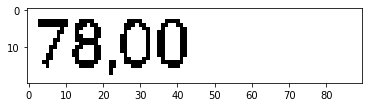

In [22]:
value_img = receipt[110:130, 40:130]
t,p = cv2.threshold(value_img, 150, 255, cv2.THRESH_BINARY)
plt.imshow(p)
t(pytesseract.image_to_string(p, config='--psm 7'))


SyntaxError: illegal target for annotation (<ipython-input-242-c0371baabd02>, line 1)

In [79]:
    due_date_img = receipt[1090:1110,10:90]
    #plt.imshow(due_date_img)
    due_date = pytesseract.image_to_string(due_date_img)

In [80]:
due_date

'09/08/2019'

In [ ]:
image = 'AgADAQADeKgxG1JUiEYg7_2Q-YJFHvsgFDAABAEAAwIAA3kAA2p1AwABFgQ'
receipt_BGR = cv2.imread('../receipts/' + image)
receipt = cv2.cvtColor(receipt_BGR, cv2.COLOR_BGR2GRAY)

, bin_receipt = cv2.threshold(receipt, 1, 255, cv2.THRESH_BINARY_INV)
#bin_receipt = cv2.adaptiveThreshold(receipt,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,20)

kernel = np.ones((2,2),np.uint8)
dilate = cv2.erode(receipt, kernel)

text = pytesseract.image_to_string(receipt)

for i in text.split('\n'):
    if 'descri' in i:
        

In [243]:
texto = 'yes'
texto in ['yes', 'sim', 'ok', 'yep', 'confirmo', 'confirma']

True

In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [61]:
img = cv2.imread('../receipts/AgADAQADQagxG6r1mUbnWCq0vj0Xncz7awYABAEAAwIAA3kAA080AAIWBA')

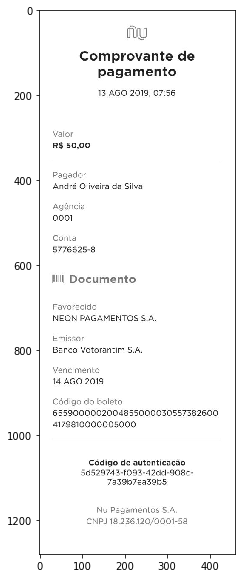

In [62]:
plt.figure(figsize=(10,10))
plt.imshow(img)

In [63]:
tpl = cv2.imread('../images/logo_itau.png')

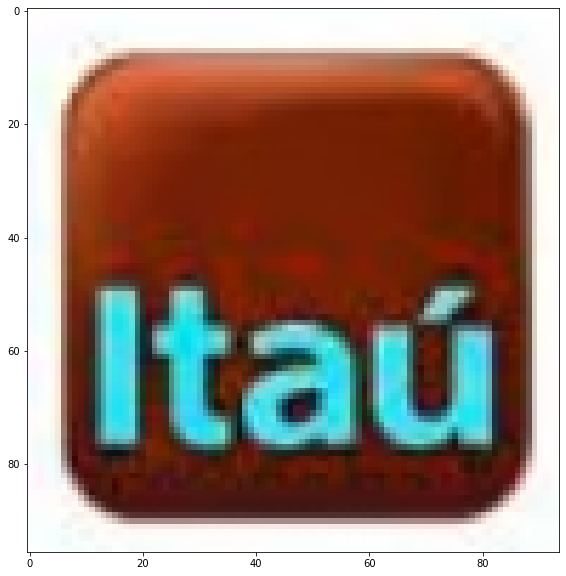

In [64]:
plt.figure(figsize=(10,10))
plt.imshow(tpl)

In [65]:
w, h = tpl.shape[:-1]
MAX_VAL = 0
for s in np.linspace(0.1, 3.0, 10)[::-1]:
    try:
        img_resize = cv2.resize(img, None, fx=s, fy=s)
        res = cv2.matchTemplate(img_resize,tpl, cv2.TM_CCOEFF_NORMED)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
        print(f'{max_val}: {s}')
        if max_val > MAX_VAL:
            MAX_VAL = max_val
    except:
        pass
print(MAX_VAL)

0.3838534653186798: 3.0
0.413534551858902: 2.6777777777777776
0.3913915455341339: 2.3555555555555556
0.35888898372650146: 2.033333333333333
0.32096928358078003: 1.711111111111111
0.2814779281616211: 1.3888888888888888
0.27068135142326355: 1.0666666666666667
0.24997203052043915: 0.7444444444444444
0.21066516637802124: 0.42222222222222217
0.413534551858902


In [104]:
top_left

(2, 3)

In [105]:
top_left = MAX_LOC
bottom_right = (top_left[0] + w, top_left[1] + h)

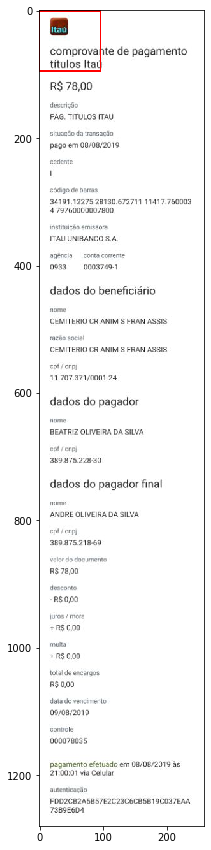

In [107]:
cv2.rectangle(img,top_left, bottom_right, 255, 2)

plt.figure(figsize=(15,15))
plt.imshow(IMG,cmap = 'gray')


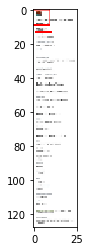

In [95]:
plt.imshow(cv2.resize(img, None, fx=.1, fy=.1))

In [64]:
np.linspace(0.1, 1.0, 20)[::-1]

array([1.        , 0.95263158, 0.90526316, 0.85789474, 0.81052632,
       0.76315789, 0.71578947, 0.66842105, 0.62105263, 0.57368421,
       0.52631579, 0.47894737, 0.43157895, 0.38421053, 0.33684211,
       0.28947368, 0.24210526, 0.19473684, 0.14736842, 0.1       ])